In [1]:
import numpy as np

In [2]:
import torch

In [3]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [4]:
import data_loaders

ModuleNotFoundError: ignored

In [ ]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [ ]:
from deep_emotion import Deep_Emotion

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print("cuda:0") if torch.cuda.is_available() else print("cpu")

In [ ]:
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing

    def forward(self, input, target):
        log_prob = F.log_softmax(input, dim=-1)
        loss = -log_prob.gather(dim=-1, index=target.unsqueeze(-1))
        loss = loss.mean()
        return (1.0 - self.smoothing) * loss - (self.smoothing / input.size(-1))


In [ ]:
label_smoothing_loss = LabelSmoothingLoss(smoothing=0.1)
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])
            loss = label_smoothing_loss(outputs, labels)

            #loss = criterion(outputs,labels)
            #print(labels[0])

            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [ ]:
epochs = 2500
lr = 0.001
batchsize = 256

In [ ]:
net = Deep_Emotion()

In [ ]:
net.to(device)

Deep_Emotion(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout(p=0.25, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout4): Dropout(p=0.25, inplace=False)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100

In [ ]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [ ]:
traincsv_file = "data2" + "/"+"train.csv"
validationcsv_file = "data2" + "/"+"val.csv"

In [ ]:
train_img_dir = "data2"+"/"+"train/"

In [ ]:
validation_img_dir = "data2"+"/"+"val/"

In [ ]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [ ]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [ ]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.00001, weight_decay = 0.0001)

In [ ]:
Train(epochs, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================
Epoch: 1 	Training Loss: 0.00526712 	Validation Loss 0.00722157 	Training Acuuarcy 76.713% 	Validation Acuuarcy 55.505%
Epoch: 2 	Training Loss: 0.00527894 	Validation Loss 0.00721603 	Training Acuuarcy 76.197% 	Validation Acuuarcy 56.173%
Epoch: 3 	Training Loss: 0.00527747 	Validation Loss 0.00718575 	Training Acuuarcy 76.386% 	Validation Acuuarcy 56.525%
Epoch: 4 	Training Loss: 0.00527093 	Validation Loss 0.00725820 	Training Acuuarcy 76.662% 	Validation Acuuarcy 54.379%
Epoch: 5 	Training Loss: 0.00528140 	Validation Loss 0.00737187 	Training Acuuarcy 76.275% 	Validation Acuuarcy 54.027%
Epoch: 6 	Training Loss: 0.00528090 	Validation Loss 0.00716014 	Training Acuuarcy 76.325% 	Validation Acuuarcy 56.841%
Epoch: 7 	Training Loss: 0.00527527 	Validation Loss 0.00727871 	Training Acuuarcy 76.433% 	Validation Acuuarcy 55.610%
Epoch: 8 	Training Loss: 0.00527783 	Validation Loss 0.00719018 	Training A

Epoch: 69 	Training Loss: 0.00527194 	Validation Loss 0.00723763 	Training Acuuarcy 76.483% 	Validation Acuuarcy 55.329%
Epoch: 70 	Training Loss: 0.00527493 	Validation Loss 0.00729313 	Training Acuuarcy 76.497% 	Validation Acuuarcy 56.032%
Epoch: 71 	Training Loss: 0.00527705 	Validation Loss 0.00717016 	Training Acuuarcy 76.376% 	Validation Acuuarcy 56.138%
Epoch: 72 	Training Loss: 0.00527060 	Validation Loss 0.00728929 	Training Acuuarcy 76.531% 	Validation Acuuarcy 56.877%
Epoch: 73 	Training Loss: 0.00528297 	Validation Loss 0.00725610 	Training Acuuarcy 76.224% 	Validation Acuuarcy 55.505%
Epoch: 74 	Training Loss: 0.00527335 	Validation Loss 0.00723182 	Training Acuuarcy 76.578% 	Validation Acuuarcy 55.751%
Epoch: 75 	Training Loss: 0.00527565 	Validation Loss 0.00725426 	Training Acuuarcy 76.457% 	Validation Acuuarcy 55.329%
Epoch: 76 	Training Loss: 0.00526236 	Validation Loss 0.00724885 	Training Acuuarcy 76.743% 	Validation Acuuarcy 55.047%
Epoch: 77 	Training Loss: 0.0052

Epoch: 137 	Training Loss: 0.00527789 	Validation Loss 0.00728481 	Training Acuuarcy 76.355% 	Validation Acuuarcy 56.173%
Epoch: 138 	Training Loss: 0.00527286 	Validation Loss 0.00724409 	Training Acuuarcy 76.507% 	Validation Acuuarcy 55.223%
Epoch: 139 	Training Loss: 0.00526691 	Validation Loss 0.00718371 	Training Acuuarcy 76.676% 	Validation Acuuarcy 55.962%
Epoch: 140 	Training Loss: 0.00526694 	Validation Loss 0.00718008 	Training Acuuarcy 76.760% 	Validation Acuuarcy 56.771%
Epoch: 141 	Training Loss: 0.00526186 	Validation Loss 0.00728521 	Training Acuuarcy 76.901% 	Validation Acuuarcy 55.364%
Epoch: 142 	Training Loss: 0.00526875 	Validation Loss 0.00726801 	Training Acuuarcy 76.740% 	Validation Acuuarcy 55.892%
Epoch: 143 	Training Loss: 0.00527593 	Validation Loss 0.00718543 	Training Acuuarcy 76.258% 	Validation Acuuarcy 56.771%
Epoch: 144 	Training Loss: 0.00526152 	Validation Loss 0.00723745 	Training Acuuarcy 76.884% 	Validation Acuuarcy 56.032%
Epoch: 145 	Training Los

Epoch: 205 	Training Loss: 0.00526441 	Validation Loss 0.00729506 	Training Acuuarcy 76.787% 	Validation Acuuarcy 55.399%
Epoch: 206 	Training Loss: 0.00525820 	Validation Loss 0.00728756 	Training Acuuarcy 76.972% 	Validation Acuuarcy 55.470%
Epoch: 207 	Training Loss: 0.00526393 	Validation Loss 0.00719815 	Training Acuuarcy 76.837% 	Validation Acuuarcy 57.052%
Epoch: 208 	Training Loss: 0.00526819 	Validation Loss 0.00723068 	Training Acuuarcy 76.608% 	Validation Acuuarcy 55.610%


KeyboardInterrupt: 

In [ ]:
test_dataset= Plain_Dataset(csv_file="data2/test.csv", img_dir = "data2/test/", datatype = 'test', transform = transformation)


In [ ]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

In [ ]:
print("Final accuracy on the testing set = ", test_correct/7099)

Final accuracy on the testing set =  tensor(0.6059, device='cuda:0')


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [ ]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:

            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

In [ ]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

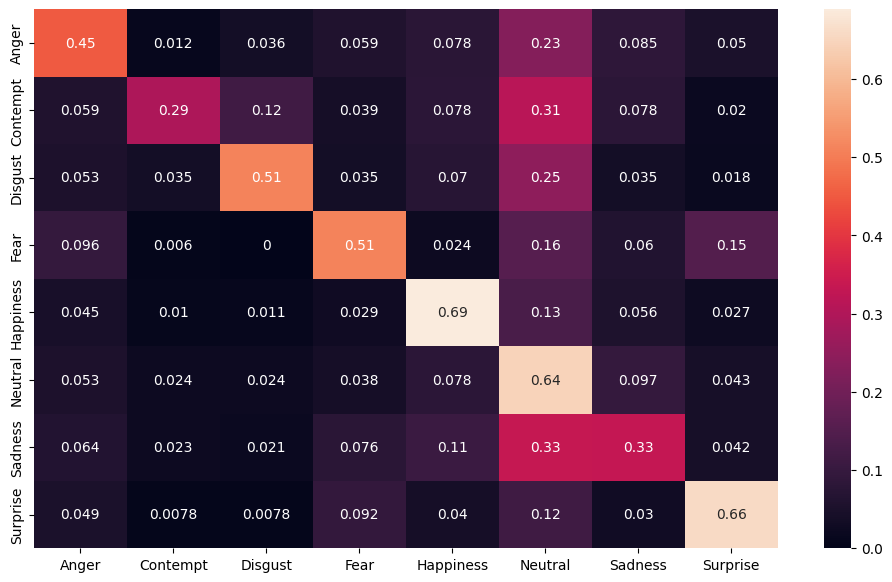

In [ ]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(precision_score(y_true, y_pred, average = "micro"))

0.5954359768981546


In [ ]:
print(precision_score(y_true, y_pred, average = "macro"))

0.4326862055572395


In [ ]:
print(recall_score(y_true, y_pred, average = "micro"))

0.5954359768981546


In [ ]:
print(recall_score(y_true, y_pred, average = "macro"))

0.5107289367419743
